# Projeto usados Hyundai
- O objetivo é fazer uma análise exploratória de dados sobre carros usados da marca Hyundai.

**OBS:** o projeto possui conversões da moeda euro para real feita em 28/09/2021, portanto, pode ocorrer atualizações nas moedas futuramente. 

## Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Base de dados
- Dados sobre carros usados da Hyundai;
- Disponível no kaggle em:
https://www.kaggle.com/mysarahmadbhat/hyundai-used-car-listing.

In [2]:
hyundai = pd.read_csv('hyundi.csv')

## Visualização dos dados

In [3]:
hyundai.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [4]:
hyundai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   tax(£)        4860 non-null   int64  
 7   mpg           4860 non-null   float64
 8   engineSize    4860 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 341.8+ KB


## Informações sobre a base de dados

Possui 4860 linhas e 9 colunas que estão descritas abaixo:
- **Model:** modelo;
- **Year:** ano;
- **Preço:** preço em euros;
- **Transmission:** tipo de transmissão;
- **Mileage:** milhagem usada;
- **FuelType:** tipo de combustível;
- **Tax(£):** imposto em euros;
- **Mpg:** milhas por galão;
- **EngineSize:** cilindradas em litros.

## Resumo Estatístico

**Variáveis Numéricas**

In [5]:
hyundai.describe()

,year,price,mileage,tax(£),mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


**Variáveis Categóricas**

In [6]:
hyundai.describe(include = ['O'])

,model,transmission,fuelType
count,4860,4860,4860
unique,16,4,4
top,Tucson,Manual,Petrol
freq,1300,3611,2902


# Análise Exploratória de Dados

- Nossa variável alvo será **price**, o preço do carro. Iremos analisá-la e analisar as relações dela com as outras variáveis.

## Price

### Menor, maior e preço médio

In [7]:
menor_preco = hyundai.price.min()
maior_preco = hyundai.price.max()
preco_medio = round(hyundai.price.mean(), 2)
print('Menor preço: £ {};\nPreço Médio: £ {};\nMaior Preço: £ {}.'.format(menor_preco, preco_medio, maior_preco))

Menor preço: £ 1200;
Preço Médio: £ 12750.13;
Maior Preço: £ 92000.


### Plotando a distribuição dos dados

C:\Users\Umbroso\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


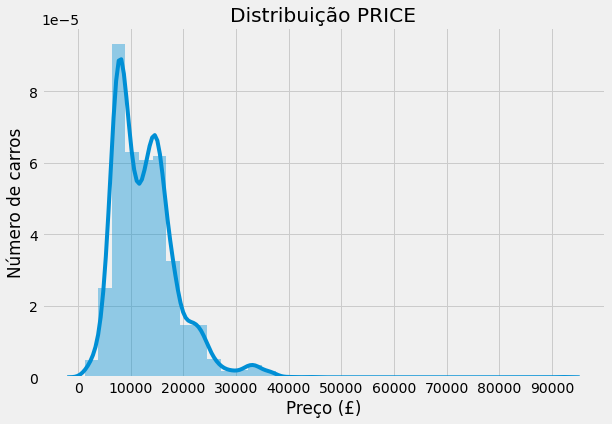

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (9, 6))
sns.distplot(hyundai.price, bins = 35)
plt.xlabel('Preço (£)')
plt.ylabel('Número de carros')
plt.title('Distribuição PRICE')
plt.xticks([i for i in range(0, 100000, 10000)])
plt.show()

### Boxplot Price

C:\Users\Umbroso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


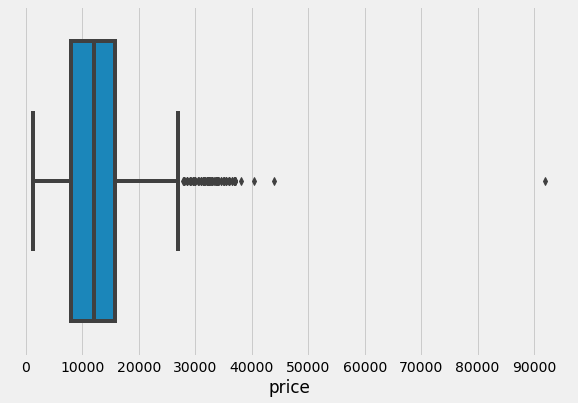

In [9]:
plt.figure(figsize = (9, 6))
sns.boxplot('price', data = hyundai)
plt.xticks([i for i in range(0, 100000, 10000)])
plt.show()

**INFORMAÇÕES OBTIDAS**

**Price**
- Menor preço: £ 1200 (R$ 7.530,20);

- Preço médio: £ 12750.13 (R$ 80.009,18);

- Maior preço: £ 92000 (R$ 577.315,24);

- Existe uma maior concentração de carros com valor de £ 5000 a £ 20000 (R\\$ 31.375,83 a R\\$ 125.503,31);

- Os valores acima de £ 26000 (R$ 163.154,31) são outliers.

## Model

### Identificando os modelos mais comuns na base

In [10]:
hyundai.model.value_counts()

 Tucson      1300
 I10         1092
 I30          536
 I20          496
 Kona         328
 Ioniq        284
 Santa Fe     245
 IX20         204
 I40          127
 IX35         118
 I800         117
 Getz           6
 Veloster       3
 Terracan       2
 Amica          1
 Accent         1
Name: model, dtype: int64

### Plotando os modelos

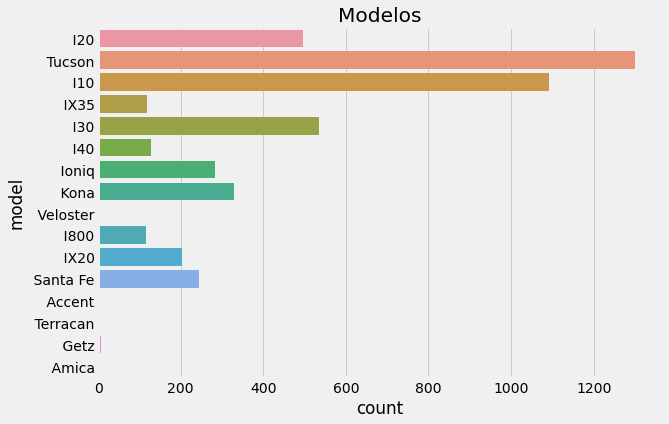

In [11]:
plt.figure(figsize = (9, 6))
sns.countplot(y = hyundai.model)
plt.title('Modelos')
plt.show()

### Qual o preço médio para cada modelo?

In [12]:
hyundai[['model', 'price']].groupby(['model'], as_index = True).mean().sort_values(by = 'price', ascending = False)

,price
model,
Santa Fe,24225.200000
Ioniq,18056.827465
I800,16659.076923
Tucson,15818.713846
Kona,15652.777439
I30,11609.555970
I40,10927.188976
IX20,8812.867647
I20,8810.721774


### Preço por modelo

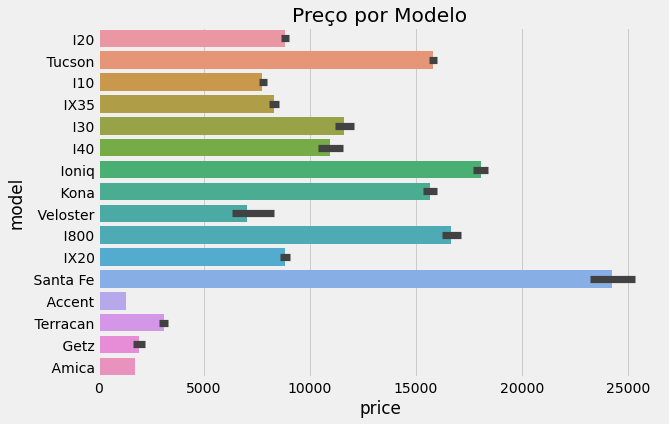

In [13]:
plt.figure(figsize = (9, 6))
sns.barplot(y = 'model', x = 'price', data = hyundai)
plt.title('Preço por Modelo')
plt.show()

**INFORMAÇÕES OBTIDAS**

**Price**
- Menor preço: £ 1200 (R$ 7.530,20);

- Preço médio: £ 12750.13 (R$ 80.009,18);

- Maior preço: £ 92000 (R$ 577.315,24);

- Existe uma maior concentração de carros com preço de £ 5000 a £ 20000 (R\\$ 31.375,83 a R\\$ 125.503,31);

- Os valores acima de £ 26000 (R$ 163.154,31) são outliers.

**Model**
- O modelo mais comum na base é o Tucson com 1300 carros;
- O modelo mais barato é o Accent com preço médio de £ 1295 (R$ 8.126,34);

- O modelo mais caro é o Santa Fé com preço médio de £ 24225.20 (R$ 152.017,14).

## Year

### Identificando o ano mais comum na base

In [14]:
hyundai.year.value_counts()

2017    1178
2019    1086
2018     987
2016     716
2015     333
2014     185
2020     159
2013     120
2010      25
2012      22
2011      19
2009      13
2007       6
2008       4
2003       3
2002       1
2005       1
2006       1
2000       1
Name: year, dtype: int64

### Plotando

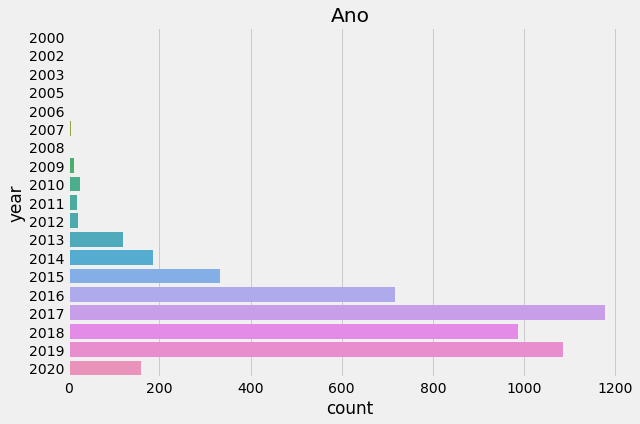

In [15]:
plt.figure(figsize = (9, 6))
sns.countplot(y = hyundai.year)
plt.title('Ano')
plt.show()

### Qual o preço médio por ano?

In [16]:
hyundai[['year', 'price']].groupby(['year'], as_index = True).mean().sort_values(by = 'price', ascending = False)

,price
year,
2020,19752.062893
2019,18077.422652
2018,12998.201621
2017,11454.435484
2016,10651.349162
2015,8549.804805
2014,6958.664865
2013,6043.041667
2011,5207.157895


### Preço por ano

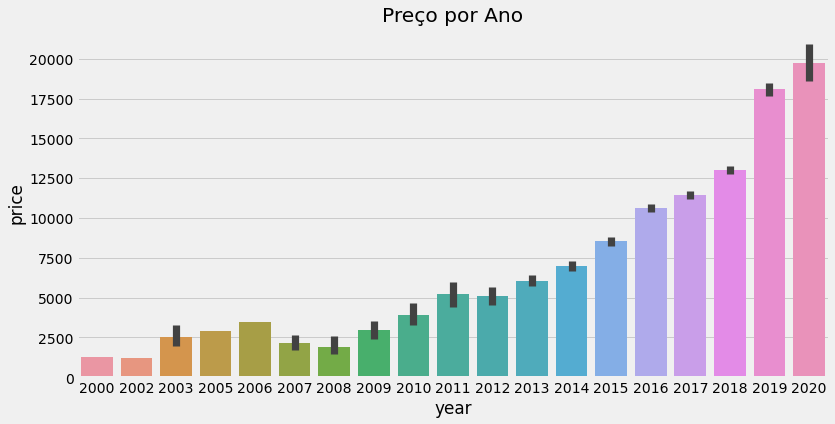

In [17]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'year', y = 'price', data = hyundai)
plt.title('Preço por Ano')
plt.show()

**INFORMAÇÕES OBTIDAS**

**Price**
- Menor preço: £ 1200 (R$ 7.530,20);

- Preço médio: £ 12750.13 (R$ 80.009,18);

- Maior preço: £ 92000 (R$ 577.315,24);

- Existe uma maior concentração de carros com preço de £ 5000 a £ 20000 (R\\$ 31.375,83 a R\\$ 125.503,31);

- Os valores acima de £ 26000 (R$ 163.154,31) são outliers.

**Model**
- O modelo mais comum na base é o Tucson com 1300 carros;
- O modelo mais barato é o Accent com preço médio de £ 1295 (R$ 8.126,34);

- O modelo mais caro é o Santa Fé com preço médio de £ 24225.20 (R$ 152.017,14).

**Year**
- A base possui carros de 2000 até 2020;
- A base têm mais carros de 2017 (1178 carros);
- Podemos visualizar que quanto mais novo o carro é, maior é seu preço;
- Os carros de 2002 (um dos anos mais antigos da base) tem o menor preço médio, £ 1200 (R$ 7.530,20);

- Os carros de 2020 (ano mais recente da base) tem o maior preço médio, £ 19752.06 (R$ 123.947,47).

## Transmission

### Qual o tipo de transmissão predominante nos dados?

In [18]:
hyundai.transmission.value_counts()

Manual       3611
Automatic     669
Semi-Auto     578
Other           2
Name: transmission, dtype: int64

### Plotando

C:\Users\Umbroso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


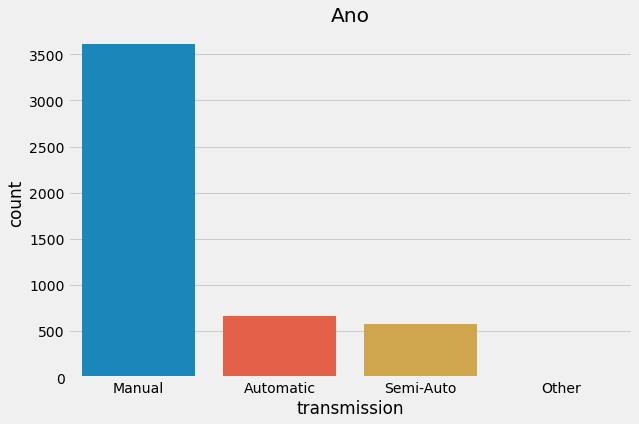

In [19]:
plt.figure(figsize = (9, 6))
sns.countplot(hyundai.transmission)
plt.title('Ano')
plt.show()

### Preço médio por tipo de transmissão

In [20]:
hyundai[['transmission', 'price']].groupby(['transmission'], as_index = True).mean().sort_values(by = 'price', ascending = False)

,price
transmission,
Semi-Auto,19119.217993
Automatic,16369.224215
Other,14745.000000
Manual,11059.049571


### Plotando

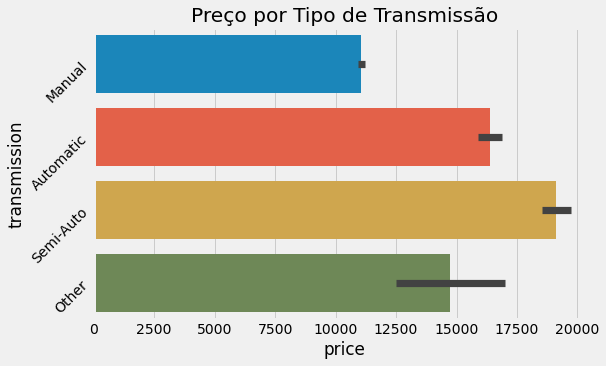

In [21]:
plt.figure(figsize = (8, 5))
sns.barplot(y = 'transmission', x = 'price', data = hyundai)
plt.title('Preço por Tipo de Transmissão')
plt.yticks(rotation = 45)
plt.show()

**INFORMAÇÕES OBTIDAS**

**Price**
- Menor preço: £ 1200 (R$ 7.530,20);

- Preço médio: £ 12750.13 (R$ 80.009,18);

- Maior preço: £ 92000 (R$ 577.315,24);

- Existe uma maior concentração de carros com preço de £ 5000 a £ 20000 (R\\$ 31.375,83 a R\\$ 125.503,31);

- Os valores acima de £ 26000 (R$ 163.154,31) são outliers.

**Model**
- O modelo mais comum na base é o Tucson com 1300 carros;
- O modelo mais barato é o Accent com preço médio de £ 1295 (R$ 8.126,34);

- O modelo mais caro é o Santa Fé com preço médio de £ 24225.20 (R$ 152.017,14).

**Year**
- A base possui carros de 2000 até 2020;
- A base têm mais carros de 2017 (1178 carros);
- Podemos visualizar que quanto mais novo o carro é, maior é seu preço;
- Os carros de 2002 (um dos anos mais antigos da base) tem o menor preço médio, £ 1200 (R$ 7.530,20);

- Os carros de 2020 (ano mais recente da base) tem o maior preço médio, £ 19752.06 (R$ 123.947,47).

**Transmission**
- A grande maioria dos carros da base possuem transmissões do tipo manual (3611 de 4860 carros da base);
- O tipo de transmissão com menor preço médio é o manual, £ 11059.05 (R$ 69.397,37);

- O tipo de transmissão com maior preço médio é o semi - automático, £ 19119.22 (R$ 119.976,27).

## Mileage

### Concentração de Milhagem

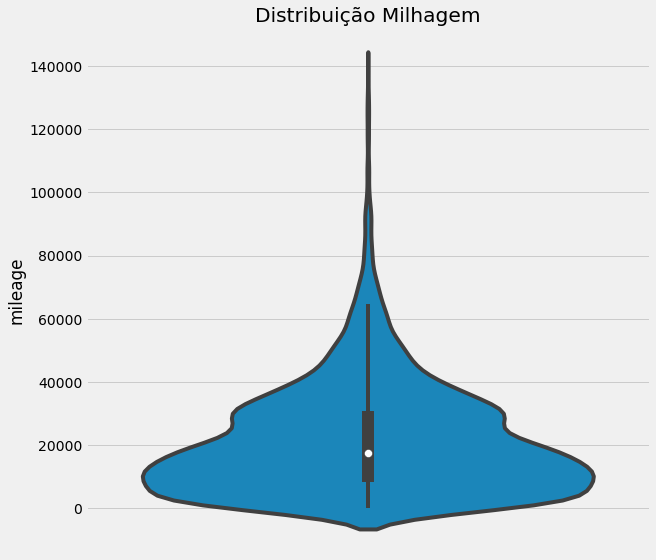

In [22]:
plt.figure(figsize = (9, 9))
sns.violinplot(y = hyundai.mileage, data = hyundai)
plt.title('Distribuição Milhagem')
plt.show()

### Visualizando o preço pela milhagem

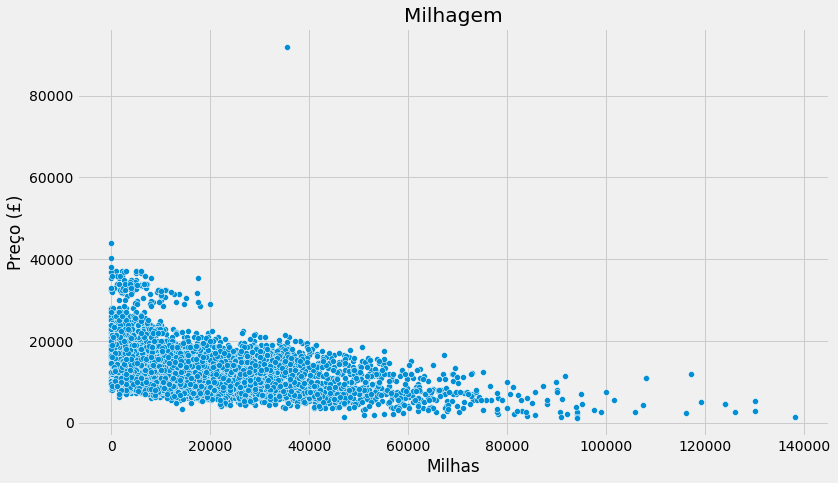

In [23]:
plt.figure(figsize = (12, 7))
sns.scatterplot(x = 'mileage', y = 'price', data = hyundai)
plt.title('Milhagem')
plt.xlabel('Milhas')
plt.ylabel('Preço (£)')
plt.show()

**INFORMAÇÕES OBTIDAS**

**Price**
- Menor preço: £ 1200 (R$ 7.530,20);

- Preço médio: £ 12750.13 (R$ 80.009,18);

- Maior preço: £ 92000 (R$ 577.315,24);

- Existe uma maior concentração de carros com preço de £ 5000 a £ 20000 (R\\$ 31.375,83 a R\\$ 125.503,31);

- Os valores acima de £ 26000 (R$ 163.154,31) são outliers.

**Model**
- O modelo mais comum na base é o Tucson com 1300 carros;
- O modelo mais barato é o Accent com preço médio de £ 1295 (R$ 8.126,34);

- O modelo mais caro é o Santa Fé com preço médio de £ 24225.20 (R$ 152.017,14).

**Year**
- A base possui carros de 2000 até 2020;
- A base têm mais carros de 2017 (1178 carros);
- Podemos visualizar que quanto mais novo o carro é, maior é seu preço;
- Os carros de 2002 (um dos anos mais antigos da base) tem o menor preço médio, £ 1200 (R$ 7.530,20);

- Os carros de 2020 (ano mais recente da base) tem o maior preço médio, £ 19752.06 (R$ 123.947,47).

**Transmission**
- A grande maioria dos carros da base possuem transmissões do tipo manual (3611 de 4860 carros da base);
- O tipo de transmissão com menor preço médio é o manual, £ 11059.05 (R$ 69.397,37);

- O tipo de transmissão com maior preço médio é o semi - automático, £ 19119.22 (R$ 119.976,27).

**Mileage**
- A maior concentração dos valores de milhagem estão na faixa de 0 a 20000 milhas;
- Desconsiderando os outliers, os carros mais caros possuem milhagem inferior a 20000 milhas.

## FuelType

### Qual tipo de combustível mais comum  na base?

In [27]:
hyundai.fuelType.value_counts()

Petrol    2902
Diesel    1608
Hybrid     349
Other        1
Name: fuelType, dtype: int64

### Plotando

C:\Users\Umbroso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


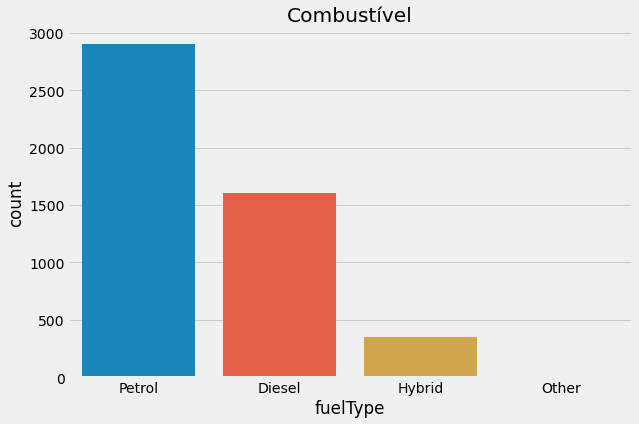

In [28]:
plt.figure(figsize = (9, 6))
sns.countplot(hyundai.fuelType)
plt.title('Combustível')
plt.show()

### Preço médio por tipo de combustível

In [29]:
hyundai[['fuelType', 'price']].groupby(['fuelType'], as_index = True).mean().sort_values(by = 'price', ascending = False)

,price
fuelType,
Hybrid,19223.272206
Diesel,14589.905473
Other,12800.000000
Petrol,10952.221571


### Plotando

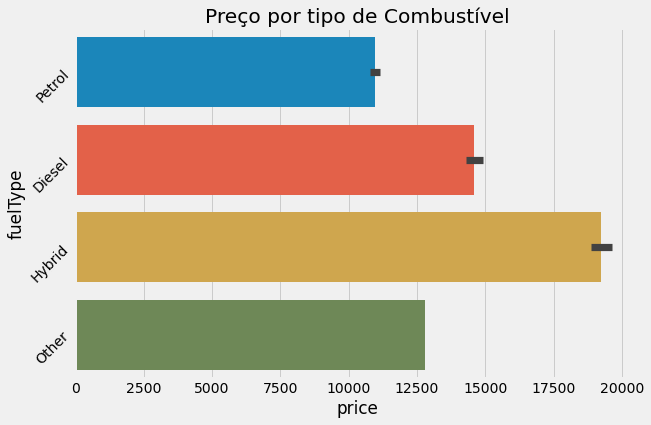

In [32]:
plt.figure(figsize = (9, 6))
sns.barplot(y = 'fuelType', x = 'price', data = hyundai)
plt.title('Preço por tipo de Combustível')
plt.yticks(rotation = 45)
plt.show()

**INFORMAÇÕES OBTIDAS**

**Price**
- Menor preço: £ 1200 (R$ 7.530,20);

- Preço médio: £ 12750.13 (R$ 80.009,18);

- Maior preço: £ 92000 (R$ 577.315,24);

- Existe uma maior concentração de carros com preço de £ 5000 a £ 20000 (R\\$ 31.375,83 a R\\$ 125.503,31);

- Os valores acima de £ 26000 (R$ 163.154,31) são outliers.

**Model**
- O modelo mais comum na base é o Tucson com 1300 carros;
- O modelo mais barato é o Accent com preço médio de £ 1295 (R$ 8.126,34);

- O modelo mais caro é o Santa Fé com preço médio de £ 24225.20 (R$ 152.017,14).

**Year**
- A base possui carros de 2000 até 2020;
- A base têm mais carros de 2017 (1178 carros);
- Podemos visualizar que quanto mais novo o carro é, maior é seu preço;
- Os carros de 2002 (um dos anos mais antigos da base) tem o menor preço médio, £ 1200 (R$ 7.530,20);

- Os carros de 2020 (ano mais recente da base) tem o maior preço médio, £ 19752.06 (R$ 123.947,47).

**Transmission**
- A grande maioria dos carros da base possuem transmissões do tipo manual (3611 de 4860 carros da base);
- O tipo de transmissão com menor preço médio é o manual, £ 11059.05 (R$ 69.397,37);

- O tipo de transmissão com maior preço médio é o semi - automático, £ 19119.22 (R$ 119.976,27).

**Mileage**
- A maior concentração dos valores de milhagem estão na faixa de 0 a 20000 milhas;
- Desconsiderando os outliers, os carros mais caros possuem milhagem inferior a 20000 milhas.

**FuelType**
- A maioria dos carros da base possuem petróleo como combustível (2902 carros);
- O tipo de combustível dos carros com menor preço médio é o petróleo, £ 10952.22 (R$ 68.486,81);

- O tipo de combustível dos carros com maior preço médio é o híbrido, £ 19223.27 (R$ 120.207,63).

## Tax(£)
- Imposto em euros

### Imposto mais comum na base

In [42]:
hyundai['tax(£)'].value_counts()

145    2259
30      674
150     586
20      307
135     247
125     233
0       136
200      99
160      98
235      35
140      32
165      32
205      31
260      23
240      19
265      15
300      14
325       9
330       4
305       2
120       2
190       1
115       1
555       1
Name: tax(£), dtype: int64

### Plotando

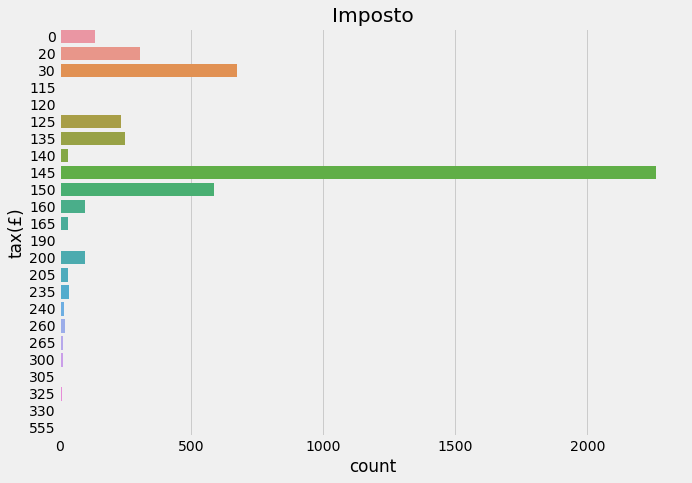

In [45]:
plt.figure(figsize = (10, 7))
sns.countplot(y = hyundai['tax(£)'])
plt.title('Imposto')
plt.show()

### Preço médio do carro por imposto

In [46]:
hyundai[['tax(£)', 'price']].groupby(['tax(£)'], as_index = True).mean().sort_values(by = 'price', ascending = False)

,price
tax(£),
135,18728.781377
240,18047.578947
235,17172.857143
140,17139.937500
145,14159.601151
265,13605.933333
200,13319.606061
330,13151.000000
150,13134.993174


### Plotando

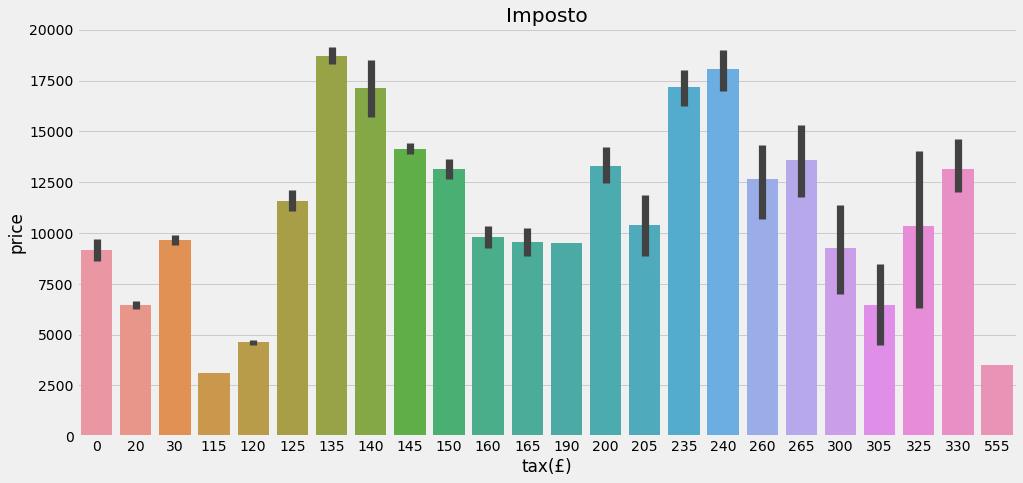

In [50]:
plt.figure(figsize = (15, 7))
sns.barplot(x = 'tax(£)', y = 'price', data = hyundai)
plt.title('Imposto')
plt.show()

**INFORMAÇÕES OBTIDAS**

**Price**
- Menor preço: £ 1200 (R$ 7.530,20);

- Preço médio: £ 12750.13 (R$ 80.009,18);

- Maior preço: £ 92000 (R$ 577.315,24);

- Existe uma maior concentração de carros com preço de £ 5000 a £ 20000 (R\\$ 31.375,83 a R\\$ 125.503,31);

- Os valores acima de £ 26000 (R$ 163.154,31) são outliers.

**Model**
- O modelo mais comum na base é o Tucson com 1300 carros;
- O modelo mais barato é o Accent com preço médio de £ 1295 (R$ 8.126,34);

- O modelo mais caro é o Santa Fé com preço médio de £ 24225.20 (R$ 152.017,14).

**Year**
- A base possui carros de 2000 até 2020;
- A base têm mais carros de 2017 (1178 carros);
- Podemos visualizar que quanto mais novo o carro é, maior é seu preço;
- Os carros de 2002 (um dos anos mais antigos da base) tem o menor preço médio, £ 1200 (R$ 7.530,20);

- Os carros de 2020 (ano mais recente da base) tem o maior preço médio, £ 19752.06 (R$ 123.947,47).

**Transmission**
- A grande maioria dos carros da base possuem transmissões do tipo manual (3611 de 4860 carros da base);
- O tipo de transmissão com menor preço médio é o manual, £ 11059.05 (R$ 69.397,37);

- O tipo de transmissão com maior preço médio é o semi - automático, £ 19119.22 (R$ 119.976,27).

**Mileage**
- A maior concentração dos valores de milhagem estão na faixa de 0 a 20000 milhas;
- Desconsiderando os outliers, os carros mais caros possuem milhagem inferior a 20000 milhas.

**FuelType**
- A maioria dos carros da base possuem petróleo como combustível (2902 carros);
- O tipo de combustível dos carros com menor preço médio é o petróleo, £ 10952.22 (R$ 68.486,81);

- O tipo de combustível dos carros com maior preço médio é o híbrido, £ 19223.27 (R$ 120.207,63).

**Tax(£)**
- O imposto mais comum na base é o de £ 145 (R$ 906,72) com 2259 carros;
- Não há evidências que o valor do imposto tenha uma relação direta com o preço do carro.

### Mpg
- Milhas por galão

### Concentração de Mpg

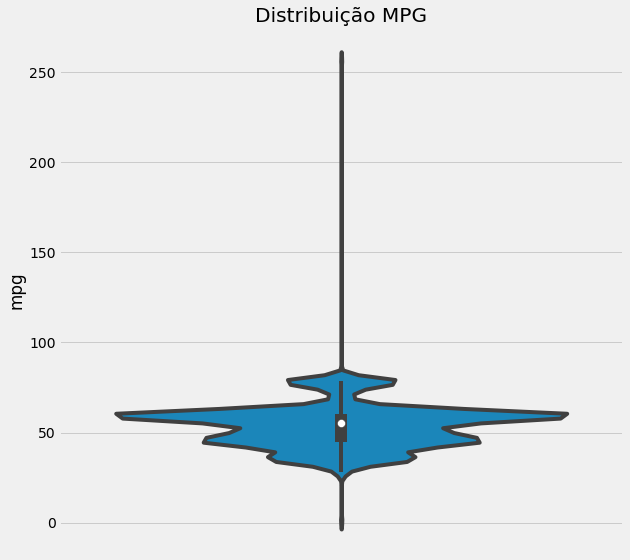

In [53]:
plt.figure(figsize = (9, 9))
sns.violinplot(y = hyundai.mpg, data = hyundai)
plt.title('Distribuição MPG')
plt.show()

### MPG por preço

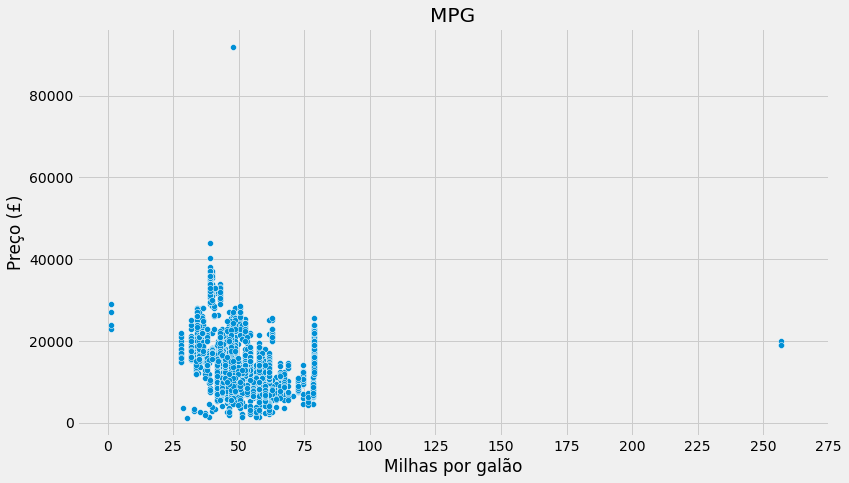

In [58]:
plt.figure(figsize = (12, 7))
sns.scatterplot(x = 'mpg', y = 'price', data = hyundai)
plt.title('MPG')
plt.xlabel('Milhas por galão')
plt.ylabel('Preço (£)')
plt.xticks([i for i in range(0, 300, 25)])
plt.show()

**INFORMAÇÕES OBTIDAS**

**Price**
- Menor preço: £ 1200 (R$ 7.530,20);

- Preço médio: £ 12750.13 (R$ 80.009,18);

- Maior preço: £ 92000 (R$ 577.315,24);

- Existe uma maior concentração de carros com preço de £ 5000 a £ 20000 (R\\$ 31.375,83 a R\\$ 125.503,31);

- Os valores acima de £ 26000 (R$ 163.154,31) são outliers.

**Model**
- O modelo mais comum na base é o Tucson com 1300 carros;
- O modelo mais barato é o Accent com preço médio de £ 1295 (R$ 8.126,34);

- O modelo mais caro é o Santa Fé com preço médio de £ 24225.20 (R$ 152.017,14).

**Year**
- A base possui carros de 2000 até 2020;
- A base têm mais carros de 2017 (1178 carros);
- Podemos visualizar que quanto mais novo o carro é, maior é seu preço;
- Os carros de 2002 (um dos anos mais antigos da base) tem o menor preço médio, £ 1200 (R$ 7.530,20);

- Os carros de 2020 (ano mais recente da base) tem o maior preço médio, £ 19752.06 (R$ 123.947,47).

**Transmission**
- A grande maioria dos carros da base possuem transmissões do tipo manual (3611 de 4860 carros da base);
- O tipo de transmissão com menor preço médio é o manual, £ 11059.05 (R$ 69.397,37);

- O tipo de transmissão com maior preço médio é o semi - automático, £ 19119.22 (R$ 119.976,27).

**Mileage**
- A maior concentração dos valores de milhagem estão na faixa de 0 a 20000 milhas;
- Desconsiderando os outliers, os carros mais caros possuem milhagem inferior a 20000 milhas.

**FuelType**
- A maioria dos carros da base possuem petróleo como combustível (2902 carros);
- O tipo de combustível dos carros com menor preço médio é o petróleo, £ 10952.22 (R$ 68.486,81);

- O tipo de combustível dos carros com maior preço médio é o híbrido, £ 19223.27 (R$ 120.207,63).

**Tax(£)**
- O imposto mais comum na base é o de £ 145 (R$ 906,72) com 2259 carros;
- Não há evidências que o valor do imposto tenha uma relação direta com o preço do carro.

**MPG**
- Os dados de mpg da base estão concentrados de 25 a 80 milhas por galão;
- Não há evidências que as milhas por galão que os carros fazem influenciam diretamente no seu preço.

### EngineSize
- Cilindradas em litros

### Qual a cilindrada mais comum na base?

In [60]:
hyundai.engineSize.value_counts()

1.6    1283
1.0    1080
1.2     795
1.7     752
1.4     311
2.2     245
2.0     220
2.5     114
0.0      47
1.1       7
2.9       2
2.4       2
1.3       2
Name: engineSize, dtype: int64

### Plotando

C:\Users\Umbroso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


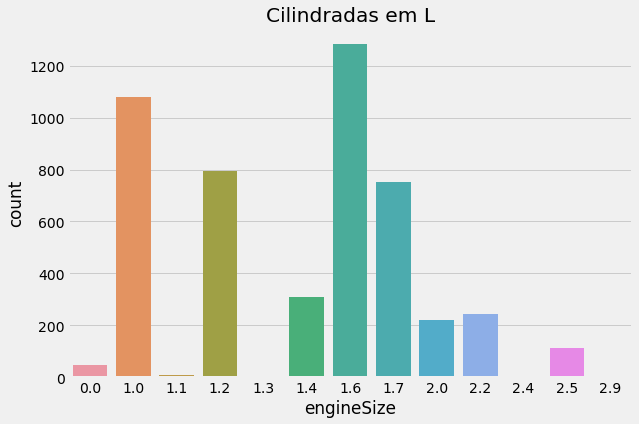

In [61]:
plt.figure(figsize = (9, 6))
sns.countplot(hyundai.engineSize)
plt.title('Cilindradas em L')
plt.show()

### Preço médio por cilindradas

In [62]:
hyundai[['engineSize', 'price']].groupby(['engineSize'], as_index = True).mean().sort_values(by = 'price', ascending = False)

,price
engineSize,
2.2,24295.791837
2.0,16915.609091
2.5,16663.263158
1.6,15711.632112
1.7,12616.678191
0.0,10193.574468
1.0,10019.635185
1.4,9598.263666
1.2,8088.085535


### Plotando

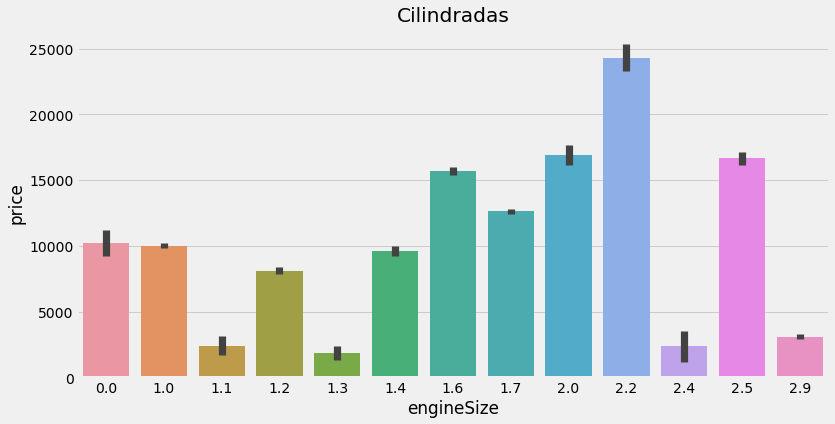

In [64]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'engineSize', y = 'price', data = hyundai)
plt.title('Cilindradas')
plt.show()

**INFORMAÇÕES OBTIDAS**

**Price**
- Menor preço: £ 1200 (R$ 7.530,20);

- Preço médio: £ 12750.13 (R$ 80.009,18);

- Maior preço: £ 92000 (R$ 577.315,24);

- Existe uma maior concentração de carros com preço de £ 5000 a £ 20000 (R\\$ 31.375,83 a R\\$ 125.503,31);

- Os valores acima de £ 26000 (R$ 163.154,31) são outliers.

**Model**
- O modelo mais comum na base é o Tucson com 1300 carros;
- O modelo mais barato é o Accent com preço médio de £ 1295 (R$ 8.126,34);

- O modelo mais caro é o Santa Fé com preço médio de £ 24225.20 (R$ 152.017,14).

**Year**
- A base possui carros de 2000 até 2020;
- A base têm mais carros de 2017 (1178 carros);
- Podemos visualizar que quanto mais novo o carro é, maior é seu preço;
- Os carros de 2002 (um dos anos mais antigos da base) tem o menor preço médio, £ 1200 (R$ 7.530,20);

- Os carros de 2020 (ano mais recente da base) tem o maior preço médio, £ 19752.06 (R$ 123.947,47).

**Transmission**
- A grande maioria dos carros da base possuem transmissões do tipo manual (3611 de 4860 carros da base);
- O tipo de transmissão com menor preço médio é o manual, £ 11059.05 (R$ 69.397,37);

- O tipo de transmissão com maior preço médio é o semi - automático, £ 19119.22 (R$ 119.976,27).

**Mileage**
- A maior concentração dos valores de milhagem estão na faixa de 0 a 20000 milhas;
- Desconsiderando os outliers, os carros mais caros possuem milhagem inferior a 20000 milhas.

**FuelType**
- A maioria dos carros da base possuem petróleo como combustível (2902 carros);
- O tipo de combustível dos carros com menor preço médio é o petróleo, £ 10952.22 (R$ 68.486,81);

- O tipo de combustível dos carros com maior preço médio é o híbrido, £ 19223.27 (R$ 120.207,63).

**Tax(£)**
- O imposto mais comum na base é o de £ 145 (R$ 906,72) com 2259 carros;
- Não há evidências que o valor do imposto tenha uma relação direta com o preço do carro.

**MPG**
- Os dados de mpg da base estão concentrados de 25 a 80 milhas por galão;
- Não há evidências que as milhas por galão que os carros fazem influenciam diretamente no seu preço.

**EngineSize**
- A cilindrada mais comum na base é a de 1.6 L (1283 carros);
- Os carros mais caros da base (com maior preço médio) possuem cilindradas maiores que 1.4 L.

## Correlações

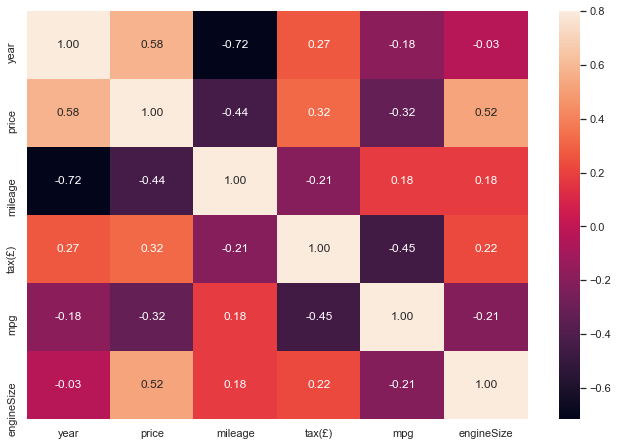

In [76]:
correlacoes = hyundai.corr()
sns.set(rc = {'axes.facecolor': 'white', 'figure.facecolor': 'white'})
f, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(correlacoes, vmax = .8, annot_kws = {'size': 12}, annot = True, fmt = '.2f')
plt.show()

# Conclusões da Análise Exploratória

**Price**
- Menor preço: £ 1200 (R$ 7.530,20);

- Preço médio: £ 12750.13 (R$ 80.009,18);

- Maior preço: £ 92000 (R$ 577.315,24);

- Existe uma maior concentração de carros com preço de £ 5000 a £ 20000 (R\\$ 31.375,83 a R\\$ 125.503,31);

- Os valores acima de £ 26000 (R$ 163.154,31) são outliers.

**Model**
- O modelo mais comum na base é o Tucson com 1300 carros;
- O modelo mais barato é o Accent com preço médio de £ 1295 (R$ 8.126,34);

- O modelo mais caro é o Santa Fé com preço médio de £ 24225.20 (R$ 152.017,14).

**Year**
- A base possui carros de 2000 até 2020;
- A base têm mais carros de 2017 (1178 carros);
- Podemos visualizar que quanto mais novo o carro é, maior é seu preço;
- Os carros de 2002 (um dos anos mais antigos da base) tem o menor preço médio, £ 1200 (R$ 7.530,20);

- Os carros de 2020 (ano mais recente da base) tem o maior preço médio, £ 19752.06 (R$ 123.947,47).

**Transmission**
- A grande maioria dos carros da base possuem transmissões do tipo manual (3611 de 4860 carros da base);
- O tipo de transmissão com menor preço médio é o manual, £ 11059.05 (R$ 69.397,37);

- O tipo de transmissão com maior preço médio é o semi - automático, £ 19119.22 (R$ 119.976,27).

**Mileage**
- A maior concentração dos valores de milhagem estão na faixa de 0 a 20000 milhas;
- Desconsiderando os outliers, os carros mais caros possuem milhagem inferior a 20000 milhas.

**FuelType**
- A maioria dos carros da base possuem petróleo como combustível (2902 carros);
- O tipo de combustível dos carros com menor preço médio é o petróleo, £ 10952.22 (R$ 68.486,81);

- O tipo de combustível dos carros com maior preço médio é o híbrido, £ 19223.27 (R$ 120.207,63).

**Tax(£)**
- O imposto mais comum na base é o de £ 145 (R$ 906,72) com 2259 carros;
- Não há evidências que o valor do imposto tenha uma relação direta com o preço do carro.

**MPG**
- Os dados de mpg da base estão concentrados de 25 a 80 milhas por galão;
- Não há evidências que as milhas por galão que os carros fazem influenciam diretamente no seu preço.

**EngineSize**
- A cilindrada mais comum na base é a de 1.6 L (1283 carros);
- Os carros mais caros da base (com maior preço médio) possuem cilindradas maiores que 1.4 L.

**Correlações**
- Ano (year) e cilindrada (engineSize) possuem uma correlação positiva (> 0.5) com o preço do carro, ou seja, quando seus valores aumentam, a tendência é o preço aumentar também;
- Existe uma correlação negativa (-0.72) entre as variáveis ano (year) e milhagem (mileage), indicando que quanto mais antigo o carro é, maior será sua milhagem rodada.